In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/un-global-water-data-2012-2022/water.csv


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/un-global-water-data-2012-2022/water.csv')
data = pd.DataFrame(df)
data.head()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2012,30.777313,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2013,28.224066,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2014,25.679155,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2015,23.142490,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2016,20.614330,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total


In [4]:
data.dtypes
#to check what data types are being used by the data set

DATAFLOW                                                                           object
REF_AREA:Geographic area                                                           object
INDICATOR:Indicator                                                                object
SEX:Sex                                                                            object
TIME_PERIOD:Time period                                                             int64
OBS_VALUE:Observation Value                                                       float64
UNIT_MULTIPLIER:Unit multiplier                                                   float64
UNIT_MEASURE:Unit of measure                                                       object
OBS_STATUS:Observation Status                                                     float64
OBS_CONF:Observation confidentaility                                              float64
LOWER_BOUND:Lower Bound                                                           float64
UPPER_BOUN

In [5]:
data.shape
#shape of the data

(36519, 22)

In [6]:
data.isnull().sum()


DATAFLOW                                                                              0
REF_AREA:Geographic area                                                              0
INDICATOR:Indicator                                                                   0
SEX:Sex                                                                               0
TIME_PERIOD:Time period                                                               0
OBS_VALUE:Observation Value                                                           0
UNIT_MULTIPLIER:Unit multiplier                                                   36519
UNIT_MEASURE:Unit of measure                                                          0
OBS_STATUS:Observation Status                                                     36519
OBS_CONF:Observation confidentaility                                              36519
LOWER_BOUND:Lower Bound                                                           36519
UPPER_BOUND:Upper Bound         

In [7]:
data.describe()
#describes a summary of the dataset 

,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,LOWER_BOUND:Lower Bound,UPPER_BOUND:Upper Bound,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided
count,36519.000000,36519.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2016.848243,39.625292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.091017,38.467088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2012.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2014.000000,2.294425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,26.165874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019.000000,80.827447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2022.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_unique = data['TIME_PERIOD:Time period'].drop_duplicates().sort_values()
data_unique

0     2012
1     2013
2     2014
3     2015
4     2016
5     2017
6     2018
7     2019
8     2020
9     2021
10    2022
Name: TIME_PERIOD:Time period, dtype: int64

In [9]:
data_unique_region = data['REF_AREA:Geographic area'].drop_duplicates().sort_values()
data_unique_region

1683            ABW: Aruba
0         AFG: Afghanistan
1171           AGO: Angola
1281         AIA: Anguilla
466           ALB: Albania
               ...        
27279           WSM: Samoa
36108           YEM: Yemen
29291    ZAF: South Africa
36214          ZMB: Zambia
36341        ZWE: Zimbabwe
Name: REF_AREA:Geographic area, Length: 279, dtype: object

In [10]:
data_afg = data[data["REF_AREA:Geographic area"] == 'AFG: Afghanistan']
data_afg

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2012,30.777313,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2013,28.224066,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2014,25.679155,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2015,23.142490,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_H-N: Proportion of population with no h...,_T: Total,2016,20.614330,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_SCH_W-N: Proportion of schools with no drin...,_T: Total,2017,24.500000,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2022),NaN,NaN,NaN,NaN,NaN,_T: Total
148,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_SCH_W-N: Proportion of schools with no drin...,_T: Total,2018,23.125000,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2022),NaN,NaN,NaN,NaN,NaN,_T: Total
149,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_SCH_W-N: Proportion of schools with no drin...,_T: Total,2019,21.750000,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2022),NaN,NaN,NaN,NaN,NaN,_T: Total
150,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_SCH_W-N: Proportion of schools with no drin...,_T: Total,2020,21.750000,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2022),NaN,NaN,NaN,NaN,NaN,_T: Total


In [11]:
data_afg_sorted = data_afg.sort_values(by = 'TIME_PERIOD:Time period', ascending = False)
data_afg_sorted

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
76,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_W-P: Proportion of population using pip...,_T: Total,2022,23.417368,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
98,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_W-QUA: Proportion of population using o...,_T: Total,2022,30.034098,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
21,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_W-AVA: Proportion of population using i...,_T: Total,2022,75.005970,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
43,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_W-I: Proportion of population using imp...,_T: Total,2022,83.346762,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
54,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_W-L: Proportion of population using lim...,_T: Total,2022,1.171391,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_W-NP: Proportion of population using no...,_T: Total,2012,44.784648,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
44,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_W-L: Proportion of population using lim...,_T: Total,2012,4.458136,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
33,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_W-I: Proportion of population using imp...,_T: Total,2012,58.607628,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
22,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,WS_PPL_W-B: Proportion of population using bas...,_T: Total,2012,33.025494,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TIME_PERIOD:Time period', ylabel='OBS_VALUE:Observation Value'>

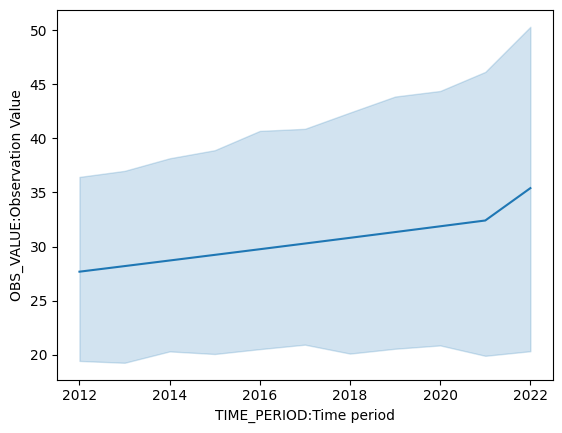

In [12]:
sns.lineplot(data = data_afg_sorted, x = 'TIME_PERIOD:Time period' ,y = 'OBS_VALUE:Observation Value')

In [13]:
data_sorted = data.sort_values(by ='OBS_VALUE:Observation Value', ascending = False)
data_sorted

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
18259,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,LIE: Liechtenstein,WS_PPL_W-P: Proportion of population using pip...,_T: Total,2019,100.0,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
20849,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,MNE: Montenegro,WS_HCF_W-B: Proportion of health care faciliti...,_T: Total,2021,100.0,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2022) W...,NaN,NaN,NaN,NaN,NaN,_T: Total
20843,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,MNE: Montenegro,WS_HCF_W-B: Proportion of health care faciliti...,_T: Total,2015,100.0,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2022) W...,NaN,NaN,NaN,NaN,NaN,_T: Total
20844,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,MNE: Montenegro,WS_HCF_W-B: Proportion of health care faciliti...,_T: Total,2016,100.0,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2022) W...,NaN,NaN,NaN,NaN,NaN,_T: Total
20845,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,MNE: Montenegro,WS_HCF_W-B: Proportion of health care faciliti...,_T: Total,2017,100.0,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2022) W...,NaN,NaN,NaN,NaN,NaN,_T: Total
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,NRU: Nauru,WS_PPL_W-SW: Proportion of population using su...,_T: Total,2016,0.0,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
21665,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,NRU: Nauru,WS_PPL_W-SW: Proportion of population using su...,_T: Total,2017,0.0,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
5939,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,CHL: Chile,WS_PPL_W-SW: Proportion of population using su...,_T: Total,2015,0.0,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total
5940,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,CHL: Chile,WS_PPL_W-SW: Proportion of population using su...,_T: Total,2016,0.0,NaN,PCNT: %,NaN,NaN,...,NaN,NaN,NaN,WHO/UNICEF Joint Monitoring Programme (2023),NaN,NaN,NaN,NaN,NaN,_T: Total


(array([8827., 1811., 1134.,  985.,  930.,  724.,  772.,  618.,  601.,
         513.,  436.,  419.,  442.,  510.,  506.,  448.,  418.,  405.,
         346.,  426.,  310.,  319.,  348.,  371.,  274.,  259.,  270.,
         361.,  250.,  203.,  194.,  211.,  217.,  242.,  291.,  246.,
         345.,  436.,  403.,  378.,  389.,  354.,  342.,  377.,  542.,
         691.,  617.,  794., 1186., 4028.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <BarContainer object of 50 artists>)

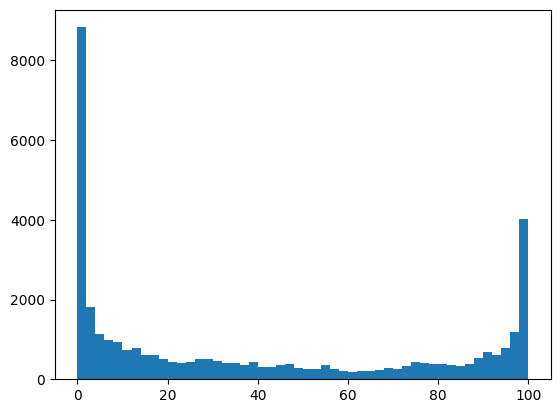

In [14]:
plt.hist(data = data_sorted, x = 'OBS_VALUE:Observation Value', bins = 50)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


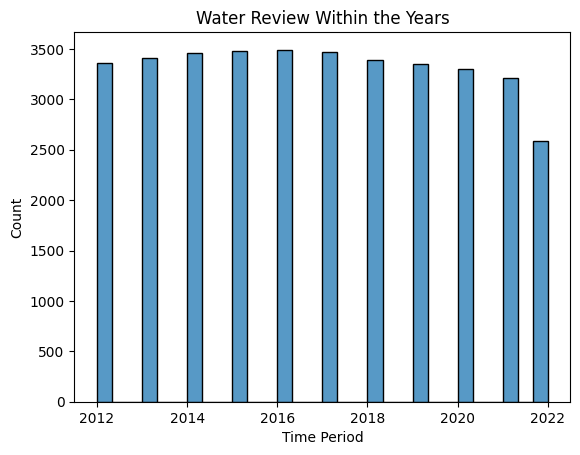

In [15]:
sns.histplot(data = data, x = 'TIME_PERIOD:Time period', bins = 30)
plt.xlabel("Time Period")
plt.ylabel("Count")
plt.title("Water Review Within the Years")
plt.show()
#draws the water review within the years, 